# EIS fitting

In [6]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [7]:
def parallel_rc(f, R, C):
    omega = 2 * np.pi * f
    Z_real = R / (1 + (omega * R * C)**2)
    Z_imag = - (omega * R**2 * C) / (1 + (omega * R * C)**2)
    return Z_real + 1j * Z_imag


In [8]:
frequencies = np.logspace(1, 6, num=50)
R_true = 10
C_true = 1e-6
Z_simulated = parallel_rc(frequencies, R_true, C_true)
Z_real_simulated = Z_simulated.real
Z_imag_simulated = Z_simulated.imag


In [9]:
def rc_model(f, R, C):
    Z = parallel_rc(f, R, C)
    return np.concatenate([Z.real, Z.imag])

# Combine real and imaginary parts
Z_combined = np.concatenate([Z_real_simulated, Z_imag_simulated])

# Initial guess for R and C
initial_guess = [1, 1e-6]

# Curve fitting
popt, pcov = curve_fit(rc_model, frequencies, Z_combined, p0=initial_guess)
R_fit, C_fit = popt

print(f"Fitted values: R = {R_fit:.2f} Ω, C = {C_fit:.2e} F")


Fitted values: R = 10.00 Ω, C = 1.00e-06 F


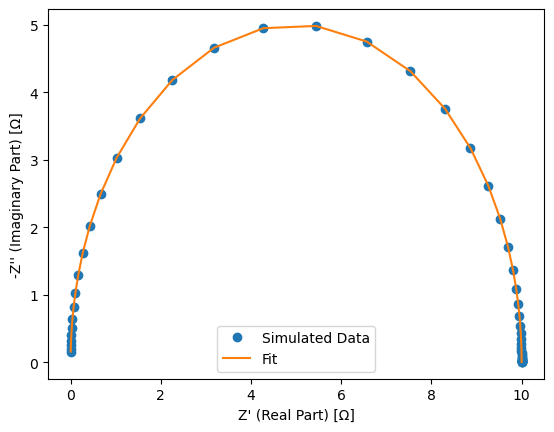

In [10]:
plt.figure()
plt.plot(Z_real_simulated, -Z_imag_simulated, 'o', label='Simulated Data')
Z_fit = parallel_rc(frequencies, R_fit, C_fit)
plt.plot(Z_fit.real, -Z_fit.imag, '-', label='Fit')
plt.xlabel('Z\' (Real Part) [Ω]')
plt.ylabel('-Z\'\' (Imaginary Part) [Ω]')
plt.legend()
plt.show()
